# Simpson EDA

With this dataset, I will be doing an EDA.
After looking at the data set and getting familiar with it, a couple of questions came to mind.
1. Which season was the most popular overall based on US viewings in millions, imdb and tmdb ratings?
2. Which season was the least popular overall based on US viewings in millions, imdb and tmdb ratings?
3. Which episode was the most popular based on US viewings in millions, imdb and tmdb ratings?
4. Which episode was the least popular based on US viewings in millions, imdb and tmdb ratings?
5. Which episode was the most popular for each season based on US viewings in millions, imdb and tmdb ratings?
6. Which episode was the least popular for each season based on US viewings in millions, imdb, and tmdb ratings?

In [296]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

##### Firstly, I will read in the CSV, get info on the data such as the data types, how many rows and columns and to check if there are any missing values.

In [297]:
sims = pd.read_csv('../Simpsons EDA/data/simpsons_episodes.csv')
sims.head()

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,101
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.400,62
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.500,58
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.200,52
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.900,53


In [298]:
sims.shape

(747, 14)

In [299]:
sims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      747 non-null    int64  
 1   title                   747 non-null    object 
 2   description             747 non-null    object 
 3   original_air_date       747 non-null    object 
 4   production_code         747 non-null    object 
 5   directed_by             747 non-null    object 
 6   written_by              747 non-null    object 
 7   season                  747 non-null    int64  
 8   number_in_season        747 non-null    int64  
 9   number_in_series        747 non-null    int64  
 10  us_viewers_in_millions  746 non-null    float64
 11  imdb_rating             747 non-null    float64
 12  tmdb_rating             747 non-null    float64
 13  tmdb_vote_count         747 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory 

In [300]:
sims.describe()

,id,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
count,747.000000,747.000000,747.000000,747.000000,746.000000,747.000000,747.000000,747.000000
mean,373.000000,17.444444,11.610442,374.325301,10.384531,7.150870,6.379029,18.070950
std,215.784615,9.734715,6.497023,216.271060,6.963214,0.818934,0.879565,8.874704
min,0.000000,1.000000,1.000000,1.000000,0.770000,4.000000,0.000000,1.000000
25%,186.500000,9.000000,6.000000,187.500000,4.755000,6.600000,5.800000,14.000000
50%,373.000000,17.000000,12.000000,374.000000,9.015000,7.000000,6.300000,17.000000
75%,559.500000,26.000000,17.000000,560.500000,14.837500,7.700000,7.000000,23.000000
max,746.000000,34.000000,25.000000,750.000000,33.600000,9.300000,8.600000,101.000000


In [301]:
sims.isna().any()

id                        False
title                     False
description               False
original_air_date         False
production_code           False
directed_by               False
written_by                False
season                    False
number_in_season          False
number_in_series          False
us_viewers_in_millions     True
imdb_rating               False
tmdb_rating               False
tmdb_vote_count           False
dtype: bool

##### While checking for NaNs, I saw one missing value from the US viewing column, so I filled it in with linear interpolation. I felt that was the better choice because from looking at the data, it seems the viewings were declining each episode.

In [302]:
sims[sims.us_viewers_in_millions.isna()]

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
422,422,"Double, Double, Boy in Trouble",Bart trades lives with his multi-millionaire l...,2008-10-26,KABF14,Nancy Kruse,Bill Odenkirk,20,3,423,NaN,6.9,5.8,20


In [303]:
sims['us_viewers_in_millions'][400:450].interpolate(method = 'linear',inplace=True)

In [304]:
sims[sims.us_viewers_in_millions.isna()]

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count


In [305]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# EDA begins:

### Most and Least Popular Season

In [306]:
sims.groupby('season').mean(numeric_only=True)[['us_viewers_in_millions']].sort_values(by='us_viewers_in_millions',ascending=False)

,us_viewers_in_millions
season,
1,27.807692
2,24.404545
4,22.395455
3,21.766667
5,18.913636
9,16.052000
6,15.552000
12,15.485238
7,14.924000


<Axes: xlabel='season'>

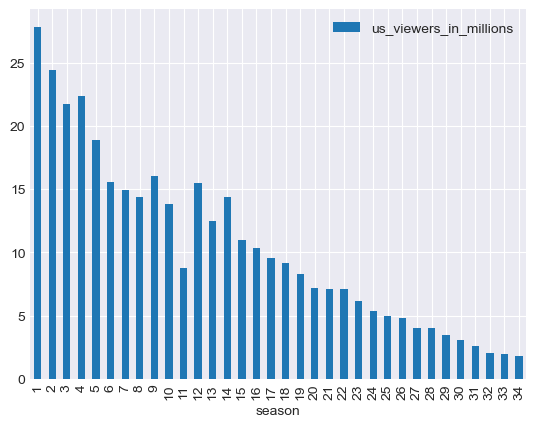

In [307]:
sims.groupby('season').mean(numeric_only=True)[['us_viewers_in_millions']].plot(kind='bar')

In [308]:
sims.groupby('season').mean(numeric_only=True)[['imdb_rating','tmdb_rating']]

,imdb_rating,tmdb_rating
season,,
1,7.692308,7.001615
2,7.986364,7.409091
3,8.154167,7.366667
4,8.263636,7.509091
5,8.331818,7.545455
6,8.328000,7.440560
7,8.352000,7.456000
8,8.204000,7.468000
9,7.800000,7.020000


<Axes: xlabel='season'>

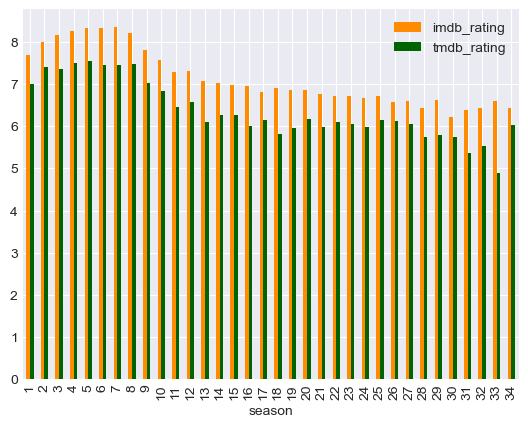

In [309]:
plt.style.use('seaborn-v0_8-darkgrid')
sims.groupby('season').mean(numeric_only=True)[['imdb_rating','tmdb_rating']].plot(kind='bar',color=['darkorange','darkgreen'])

### Most Popular Episode

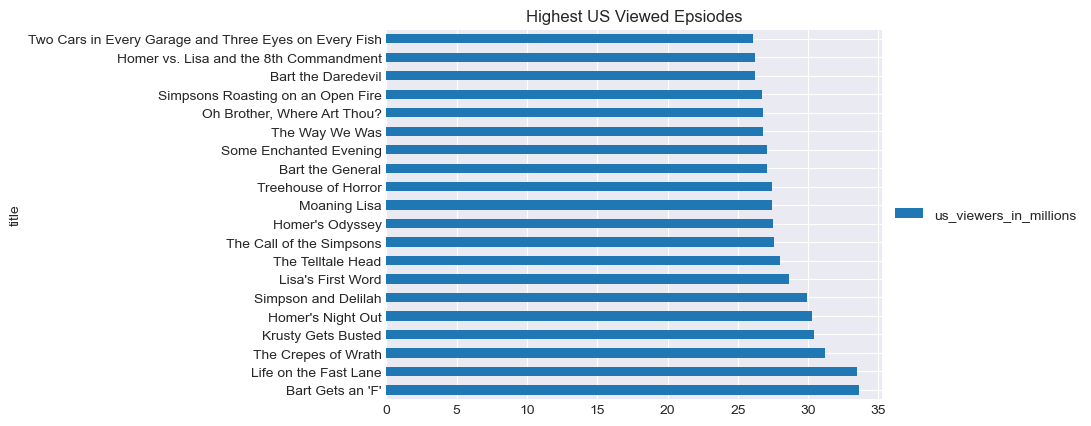

In [310]:
highest = sims.groupby(['title',]).max(numeric_only = True)[['us_viewers_in_millions']]
highest.sort_values('us_viewers_in_millions',ascending = False).head(20).plot(kind ='barh')
plt.title('Highest US Viewed Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

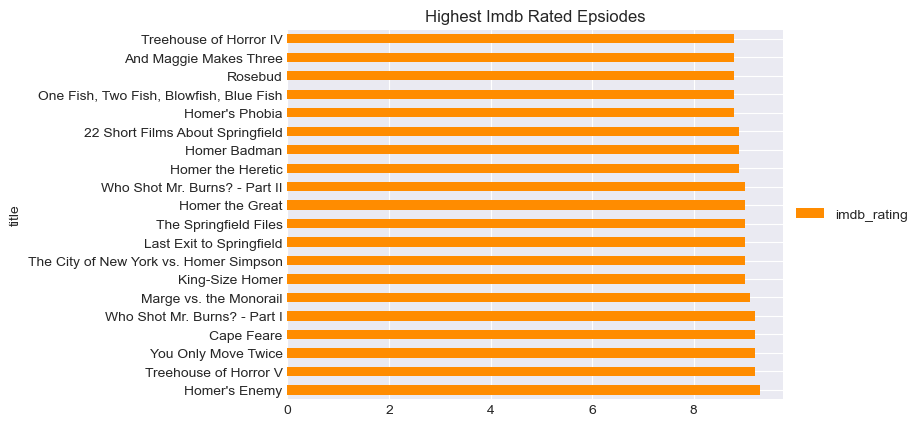

In [311]:
highest = sims.groupby(['title',]).max(numeric_only = True)[['imdb_rating']]
highest.sort_values('imdb_rating',ascending = False).head(20).plot(kind ='barh',color='darkorange')
plt.title('Highest Imdb Rated Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

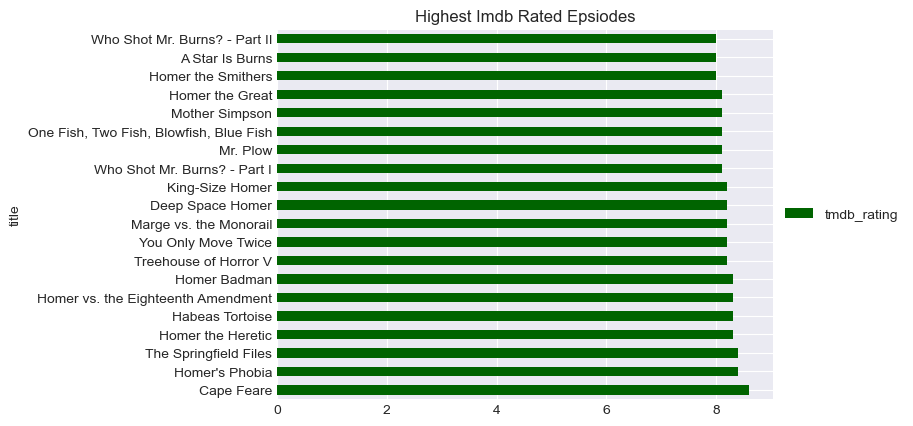

In [312]:
highest = sims.groupby(['title',]).max(numeric_only = True)[['tmdb_rating']]
highest.sort_values('tmdb_rating',ascending = False).head(20).plot(kind ='barh',color='darkgreen')
plt.title('Highest Imdb Rated Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Least Popular Episode

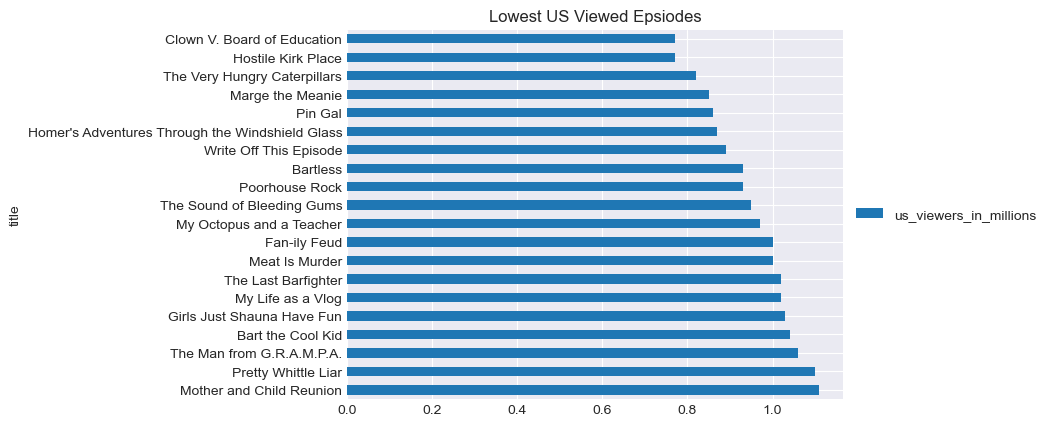

In [313]:
lowest = sims.groupby(['title',]).max(numeric_only = True)[['us_viewers_in_millions']]
lowest.sort_values('us_viewers_in_millions',ascending = False).tail(20).plot(kind ='barh')
plt.title('Lowest US Viewed Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

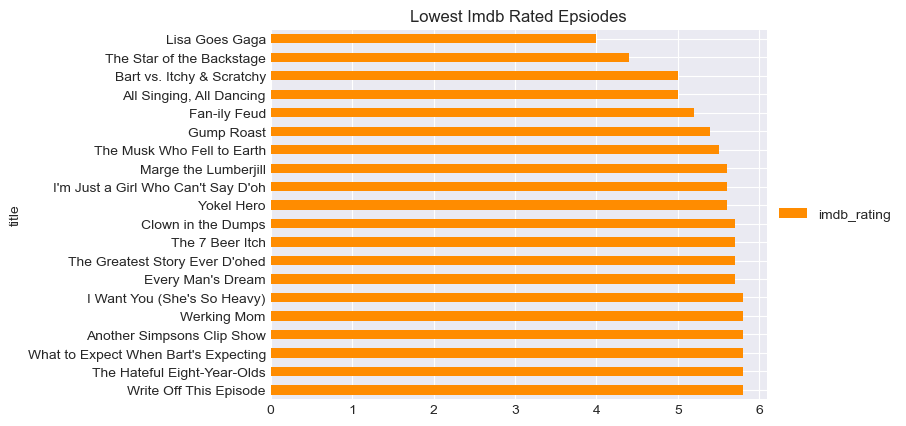

In [314]:
lowest = sims.groupby(['title',]).max(numeric_only = True)[['imdb_rating']]
lowest.sort_values('imdb_rating',ascending=False).tail(20).plot(kind='barh',color='darkorange')
plt.title('Lowest Imdb Rated Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

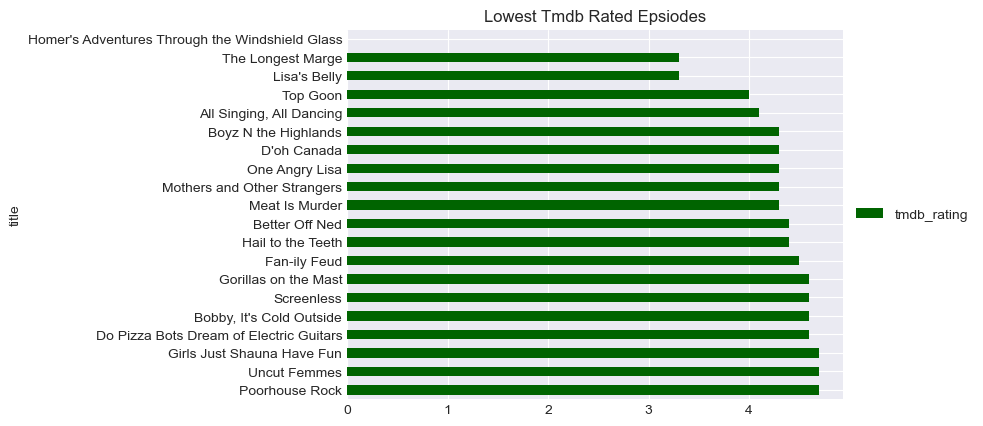

In [315]:
lowest = sims.groupby(['title',]).max(numeric_only = True)[['tmdb_rating']]
lowest.sort_values('tmdb_rating',ascending=False).tail(20).plot(kind='barh',color='darkgreen')
plt.title('Lowest Tmdb Rated Epsiodes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Most Popular Episode Each Season

In [316]:
title = "Most popular episodes each season based on US viewings"
print(f"{title}\n")
max_viewers_episodes = sims.groupby('season')['us_viewers_in_millions'].idxmax()
sims.loc[max_viewers_episodes, ['season', 'title', 'us_viewers_in_millions']]

Most popular episodes each season based on US viewings



,season,title,us_viewers_in_millions
8,1,Life on the Fast Lane,33.50
13,2,Bart Gets an 'F',33.60
54,3,Colonel Homer,25.50
68,4,Lisa's First Word,28.60
85,5,Treehouse of Horror IV,24.00
108,6,Treehouse of Horror V,22.20
128,7,Who Shot Mr. Burns? - Part II,22.60
162,8,The Springfield Files,20.41
184,9,The Two Mrs. Nahasapeemapetilons,19.80
212,10,Viva Ned Flanders,19.68


In [317]:
title = "Most popular episodes each season based on imdb ratings"
print(f"{title}\n")
max_viewers_episodes = sims.groupby('season')['imdb_rating'].idxmax()
sims.loc[max_viewers_episodes, ['season', 'title', 'imdb_rating']]

Most popular episodes each season based on imdb ratings



,season,title,imdb_rating
11,1,Krusty Gets Busted,8.3
23,2,"One Fish, Two Fish, Blowfish, Blue Fish",8.8
44,3,Flaming Moe's,8.8
70,4,Marge vs. the Monorail,9.1
82,5,Cape Feare,9.2
108,6,Treehouse of Horror V,9.2
128,7,Who Shot Mr. Burns? - Part II,9.0
175,8,Homer's Enemy,9.3
178,9,The City of New York vs. Homer Simpson,9.0
204,10,The Wizard of Evergreen Terrace,8.1


In [318]:
title = "Most popular episodes each season based on tmdb ratings"
print(f"{title}\n")
max_viewers_episodes = sims.groupby('season')['tmdb_rating'].idxmax()
sims.loc[max_viewers_episodes, ['season', 'title', 'tmdb_rating']]

Most popular episodes each season based on tmdb ratings



,season,title,tmdb_rating
1,1,Bart the Genius,7.4
23,2,"One Fish, Two Fish, Blowfish, Blue Fish",8.1
35,3,Stark Raving Dad,7.9
61,4,Homer the Heretic,8.3
82,5,Cape Feare,8.6
111,6,Homer Badman,8.3
134,7,King-Size Homer,8.2
162,8,The Springfield Files,8.4
178,9,The City of New York vs. Homer Simpson,7.8
204,10,The Wizard of Evergreen Terrace,7.6


### Least Popular Episode Each Season

In [319]:
title = "Least popular episodes each season based on US viewings"
print(f"{title}\n")
min_viewers_episodes = sims.groupby('season')['us_viewers_in_millions'].idxmin()
sims.loc[min_viewers_episodes, ['season', 'title', 'us_viewers_in_millions']]

Least popular episodes each season based on US viewings



,season,title,us_viewers_in_millions
3,1,There's No Disgrace Like Home,20.20
34,2,Blood Feud,17.30
58,3,"Brother, Can You Spare Two Dimes?",17.20
79,4,Marge in Chains,17.30
98,5,Burns' Heir,14.70
122,6,Two Dozen and One Greyhounds,11.60
148,7,22 Short Films About Springfield,10.50
165,8,Simpsoncalifragilisticexpiala(Annoyed Grunt)cious,9.10
197,9,The Trouble with Trillions,11.40
224,10,They Saved Lisa's Brain,10.45


In [320]:
title = "Least popular episodes each season based on imdb ratings"
print(f"{title}\n")
min_viewers_episodes = sims.groupby('season')['imdb_rating'].idxmin()
sims.loc[min_viewers_episodes, ['season', 'title', 'imdb_rating']]

Least popular episodes each season based on imdb ratings



,season,title,imdb_rating
2,1,Homer's Odyssey,7.3
17,2,Dancin' Homer,7.3
40,3,"Like Father, Like Clown",7.6
76,4,So It's Come to This: A Simpsons Clip Show,7.0
101,5,Lady Bouvier's Lover,7.5
105,6,Another Simpsons Clip Show,5.8
137,7,The Simpsons 138th Episode Spectacular,7.4
176,8,The Simpsons Spin-Off Showcase,7.1
188,9,"All Singing, All Dancing",5.0
214,10,"Sunday, Cruddy Sunday",7.0


In [321]:
title = "Least popular episodes each season based on tmdb ratings"
print(f"{title}\n")
min_viewers_episodes = sims.groupby('season')['tmdb_rating'].idxmin()
sims.loc[min_viewers_episodes, ['season', 'title', 'tmdb_rating']]

Least popular episodes each season based on tmdb ratings



,season,title,tmdb_rating
2,1,Homer's Odyssey,6.5
17,2,Dancin' Homer,6.8
56,3,The Otto Show,6.7
76,4,So It's Come to This: A Simpsons Clip Show,6.7
101,5,Lady Bouvier's Lover,6.8
105,6,Another Simpsons Clip Show,6.0
141,7,Scenes from the Class Struggle in Springfield,6.8
176,8,The Simpsons Spin-Off Showcase,6.3
188,9,"All Singing, All Dancing",4.1
207,10,When You Dish Upon a Star,6.0


# Conclusion

I want to first point out that US viewers in millions decline each year. This makes sense because numerous streaming came into play as the years went by. So viewers stopped watching on cable and which explains why the views when down. Also when comparing the us_views in millions and the ratings they normally had little to nothing to compare. 

1. Based on views the season that was the most popular was season 1. Based on the imdb and tmdb ratings the most popular seasons were seasons 7 and 5 respectively. But season 4 seemed to be the most popular across all when comparing. 

2. The least popular season was from seasons 30 to 34. US viewrs in millions least popular is 34 as well as which goes to what is said before that the views decline over as the years go by. So I used the ratings to determine the least popular season was season 33.

3. Most popular episode was Bart Gets an ‘F’ for viewings. While for the ratings it was between $pringfield (or, How I Learned to Stop Worrying and Love Legalized Gambling) and 22 Short Films About Springfield.

4. Least popular for views was Clown V. Board of education. For the imdb and tmdb ratings, it was Lisa Goes Gaga and Homer's Adventures Through the Windshield Glass respectivley.

5. Based on the tables only a few of the seasons the most popular episode was the same for two but not three variables. The Treehouse of Horror has different parts each season and most of each part ended up being the most popular at least among the viewers and ratings. 

6. Based on the tables only a few of the seasons the least popular episode was the same for two but not three variables.

# EDA Ends

done by: Breanyl Baker